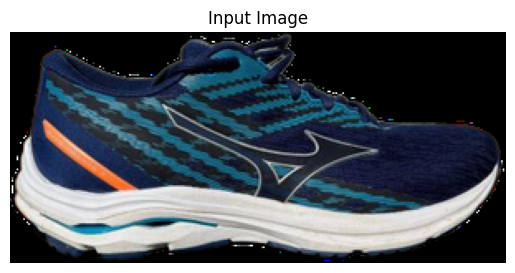

Generated Caption: mizu - mizu - mizu mizu mizu mizu mizu mizu mizu mizu mizu mizu mizu


In [12]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Load model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load and preprocess image
image_path = "temp/product-nonbg.png"
try:
    image = Image.open(image_path).convert("RGB")
except FileNotFoundError:
    print(f"File not found: {image_path}")
    raise

# Resize image for compatibility
# image = image.resize((224, 224))

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Process image and generate caption
inputs = processor(images=image, return_tensors="pt")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

outputs = model.generate(**inputs, max_length=50)

# Decode the caption
caption = processor.decode(outputs[0], skip_special_tokens=True)
if caption.strip():
    print("Generated Caption:", caption)
else:
    print("No caption generated.")


In [4]:
!pip install -q -U google-generativeai python-dotenv


In [10]:
import os
import google.generativeai as genai

from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

def upload_to_gemini(path, mime_type=None):
  """Uploads the given file to Gemini.

  See https://ai.google.dev/gemini-api/docs/prompting_with_media
  """
  file = genai.upload_file(path, mime_type=mime_type)
  print(f"Uploaded file '{file.display_name}' as: {file.uri}")
  return file

# Create the model
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 40,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)

# TODO Make these files available on the local file system
# You may need to update the file paths
files = [
  upload_to_gemini("temp/product-nonbg.png", mime_type="image/png"),
]

chat_session = model.start_chat(
  history=[
    {
      "role": "user",
      "parts": [
        files[0],
        "Write a slogan of less than 4 words for the product. Slogan should be catchy and memorable.",
      ],
    },
  ]
)

response = chat_session.send_message("INSERT_INPUT_HERE")

print(response.text)

Uploaded file 'product-nonbg.png' as: https://generativelanguage.googleapis.com/v1beta/files/6nttqjaqapdp
Here are a few options for a catchy, memorable slogan under four words for the running shoe, keeping in mind that without knowing the brand, I'm focusing on the general feeling of the shoe:


* **Run Further.**
* **Effortless Miles.**
* **Smooth Ride.**
* **Find Your Flow.**


The best choice will depend on the specific marketing goals.

